Graph

In [7]:
#closer tracking neighborhood points
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from sklearn.cluster import DBSCAN #pip3 install scikit-learn
def openFiles():
    return glob(r'C:\Users\Abel\Desktop\DepolymentTracker\frames\*.png')
#DARK BLUE, BRIGHT YELLOW, LIGHT BLUE, GREEN, (AS LONG AS BIG)
color1 = [[10,40],[40,90],[130,200],"blue"] #RedRange,GreenRange,BlueRange,name
color2 = [[15,80],[121,230],[80,120],"green"]
color3 = [[180,255],[75,80],[80,110],"pink"]
# color4 = [[240,255],[210,255],[132,160],"yellow"]
colors = [color1,color2,color3]
# colors = [color2,color3,color4]
PointCordanitesArrColor1 = [[0,740,360]]#type inital vales of eatch point
PointCordanitesArrColor2 = [[0,478,366]]
PointCordanitesArrColor3 = [[0,856,380]]
PointCordanitesArrColor4 = [[0,151,1008]]
PointCordanitesArr = [PointCordanitesArrColor1,PointCordanitesArrColor2,PointCordanitesArrColor3]
# PointCordanitesArr = [PointCordanitesArrColor2,PointCordanitesArrColor3,PointCordanitesArrColor4]
badFrames = ['bad frames:']

for i in range(1,len(openFiles())):
    for c in range(len(colors)):
        pointColor = [i]
        # print(openFiles()[i])
        image1 = plt.imread(openFiles()[i])
        # <------------------ colors[c] Picker ------------------>
        RedRange = colors[c][0]
        GreenRange = colors[c][1]
        BlueRange = colors[c][2]
        lenancy = 5
        #making mask
        blue_mask = ((RedRange[0]-lenancy < 255*image1[:, :, 0]) & (255*image1[:, :, 0] < RedRange[1]+lenancy) &  # Red Channel
                     (GreenRange[0]-lenancy < 255*image1[:, :, 1]) & (255*image1[:, :, 1] < GreenRange[1]+lenancy) &  # Green Channel
                     (BlueRange[0]-lenancy < 255*image1[:, :, 2]) & (255*image1[:, :, 2] < BlueRange[1]+lenancy))  # Blue Channel
        blue_points = np.argwhere(blue_mask)
        # Optional: Plot the image and overlay blue points
        # #<--- Show Image ---->
        # plt.imshow(image1)
        # plt.scatter(blue_points[:, 1], blue_points[:, 0], c='red', s=1, label='pixels')
        # plt.legend()
        # plt.show()
        # #<--- Image Analysis ---->
        pointsLoc = blue_points.tolist()
        mainGrid = []
        for y in range(image1.shape[0]):
            row = []
            for x in range(image1.shape[1]):
                row.append(0)
            mainGrid.append(row)
        xPixels = len(mainGrid[0])
        yPixels = len(mainGrid)
        # Example data: array of x, y coordinates
        coordinates = np.array(pointsLoc)
        # Perform DBSCAN clustering
        # If clusters are too fragmented, increase eps.
        # If clusters merge too much, decrease eps.
        # If many points are labeled as noise, reduce min_samples
        try:
            dbscan = DBSCAN(eps=20, min_samples=1)
            labels = dbscan.fit_predict(coordinates)
            
            # Calculate cluster centers
            unique_labels = set(labels)
            cluster_centers = []
            unique_labels = set(labels) - {-1}  # Exclude noise points (-1)
            cluster_centers = {}
            for label in unique_labels:
                cluster_points = coordinates[labels == label]  # Select points in the cluster
                center = cluster_points.mean(axis=0)  # Compute mean
                cluster_centers[label] = center
            dfCenters = []
            for label, center in cluster_centers.items():
                dfCenters.append(list(center))
            for j in range(len(dfCenters)):
                temp = dfCenters[j][0]
                dfCenters[j][0] = (dfCenters[j][1])
                dfCenters[j][1] = (temp)
            # print(dfCenters)
            tolorance = 25
            # print(dfCenters)
            theresPoint = 0
            #checks neighborhood
            # print(len(dfCenters))
            # print()
            # print(PointCordanitesArr[c][i-1])
            for k in range(len(dfCenters)):
                if ((dfCenters[k][0] >= PointCordanitesArr[c][i-1][1] - tolorance) and (dfCenters[k][0] <= PointCordanitesArr[c][i-1][1] + tolorance)) and ((dfCenters[k][1] >= PointCordanitesArr[c][i-1][2] - tolorance) and (dfCenters[k][1] <= PointCordanitesArr[c][i-1][2] + tolorance)):
                    # print(f'appended {colors[c][3]} in frame {i}')
                    pointColor.append(dfCenters[k][0])
                    pointColor.append(dfCenters[k][1])
                    saftey=[]
                    saftey.append(dfCenters[k][0])
                    saftey.append(dfCenters[k][1])
                    theresPoint += 1
            # if i in [10,50,100,150]:
            #     plt.imshow(image1)
            #     # print(dfCenters)
            #     for center in dfCenters:
            #         plt.scatter(pointColor[1], pointColor[2], c='purple', marker='x')  # Cluster center 
            #     plt.show() 
            if theresPoint ==0:
                print(f'no {colors[c][3]} points', openFiles()[i])
                print(f'previous: {PointCordanitesArr[c][i-1][1:]}')
                print('Current: ',dfCenters)
                ### image Visualization:
                plt.imshow(image1)
                # print(dfCenters)
                for center in dfCenters:
                    plt.scatter(center[0], center[1], c='purple', marker='x')  # Cluster center 
                plt.show() 
                badFrames.append(i)
                pointColor.append(PointCordanitesArr[c][i-1][1])
                pointColor.append(PointCordanitesArr[c][i-1][2])
                   
            if theresPoint > 1:
                print(f'more than 1 {colors[c][3]} point', openFiles()[i])
                ### image Visualization:
                plt.imshow(image1)
                # print(dfCenters)
                for center in dfCenters:
                    plt.scatter(center[0], center[1], c='purple', marker='x')  # Cluster center 
                plt.show() 
                pointColor.append(saftey[0])
                pointColor.append(saftey[1])
                badFrames.append(i)
        except ValueError:
            print(f'no {colors[c][3]} Pixels found', openFiles()[i])
            ### image Visualization:
            plt.imshow(image1)
            plt.show()
            print('BAD frames Updated be sure to fix')
            pointColor.append(PointCordanitesArr[c][i-1][1])
            pointColor.append(PointCordanitesArr[c][i-1][2])
            badFrames.append(i)
        if pointColor == []:
            print('ERROR')
        PointCordanitesArr[c].append(pointColor) 
    print(f'\rFrame {i} done ', end='', flush=True)
print(PointCordanitesArr)
def transform_array(data):
    result = {}
    for sublist in data:
        for entry in sublist:
            idx = entry[0]
            if idx not in result:
                result[idx] = [idx]
            result[idx].extend(entry[1:])
    return list(result.values())
PointCordanites = transform_array(PointCordanitesArr)
del PointCordanites[0]
print(PointCordanites)
title = ['frames']
for color in colors:
    title.append(f'{color[3]} x')
    title.append(f'{color[3]} y')
PointCordanites.insert(0,title)
if len(badFrames) > 1:
    PointCordanites.append(badFrames) # for conditional formatting =COUNTIF($A$375:$AE$375, A1) > 0
print(PointCordanites)
PointCordanites = pd.DataFrame(PointCordanites)
PointCordanites.to_csv(r'C:\Users\Abel\Desktop\DepolymentTracker\csvs\data1.csv',header=False,index=False)

Frame 370 done [[[0, 740, 360], [1, 738.0554156171285, 365.007556675063], [2, 738.1484184914842, 364.8856447688564], [3, 738.4430992736078, 364.7845036319613], [4, 738.5582524271845, 364.5], [5, 738.1231884057971, 365.17149758454104], [6, 738.2567237163814, 364.99022004889974], [7, 738.1602870813397, 364.66985645933016], [8, 738.7224880382776, 364.555023923445], [9, 738.5602836879433, 364.6713947990544], [10, 738.4345794392524, 365.10280373831773], [11, 738.6666666666666, 365.1111111111111], [12, 738.5094339622641, 365.41745283018867], [13, 738.3808411214953, 365.13084112149534], [14, 738.3325791855203, 365.158371040724], [15, 738.2660550458716, 365.1284403669725], [16, 738.454128440367, 363.79816513761466], [17, 738.323325635104, 363.5704387990762], [18, 738.5157384987893, 363.46731234866826], [19, 738.3076923076923, 363.29086538461536], [20, 738.1362530413626, 362.82238442822387], [21, 738.1172248803828, 361.6555023923445], [22, 738.4279069767442, 360.8139534883721], [23, 738.1800486

Processed frame 8/491

KeyboardInterrupt: 

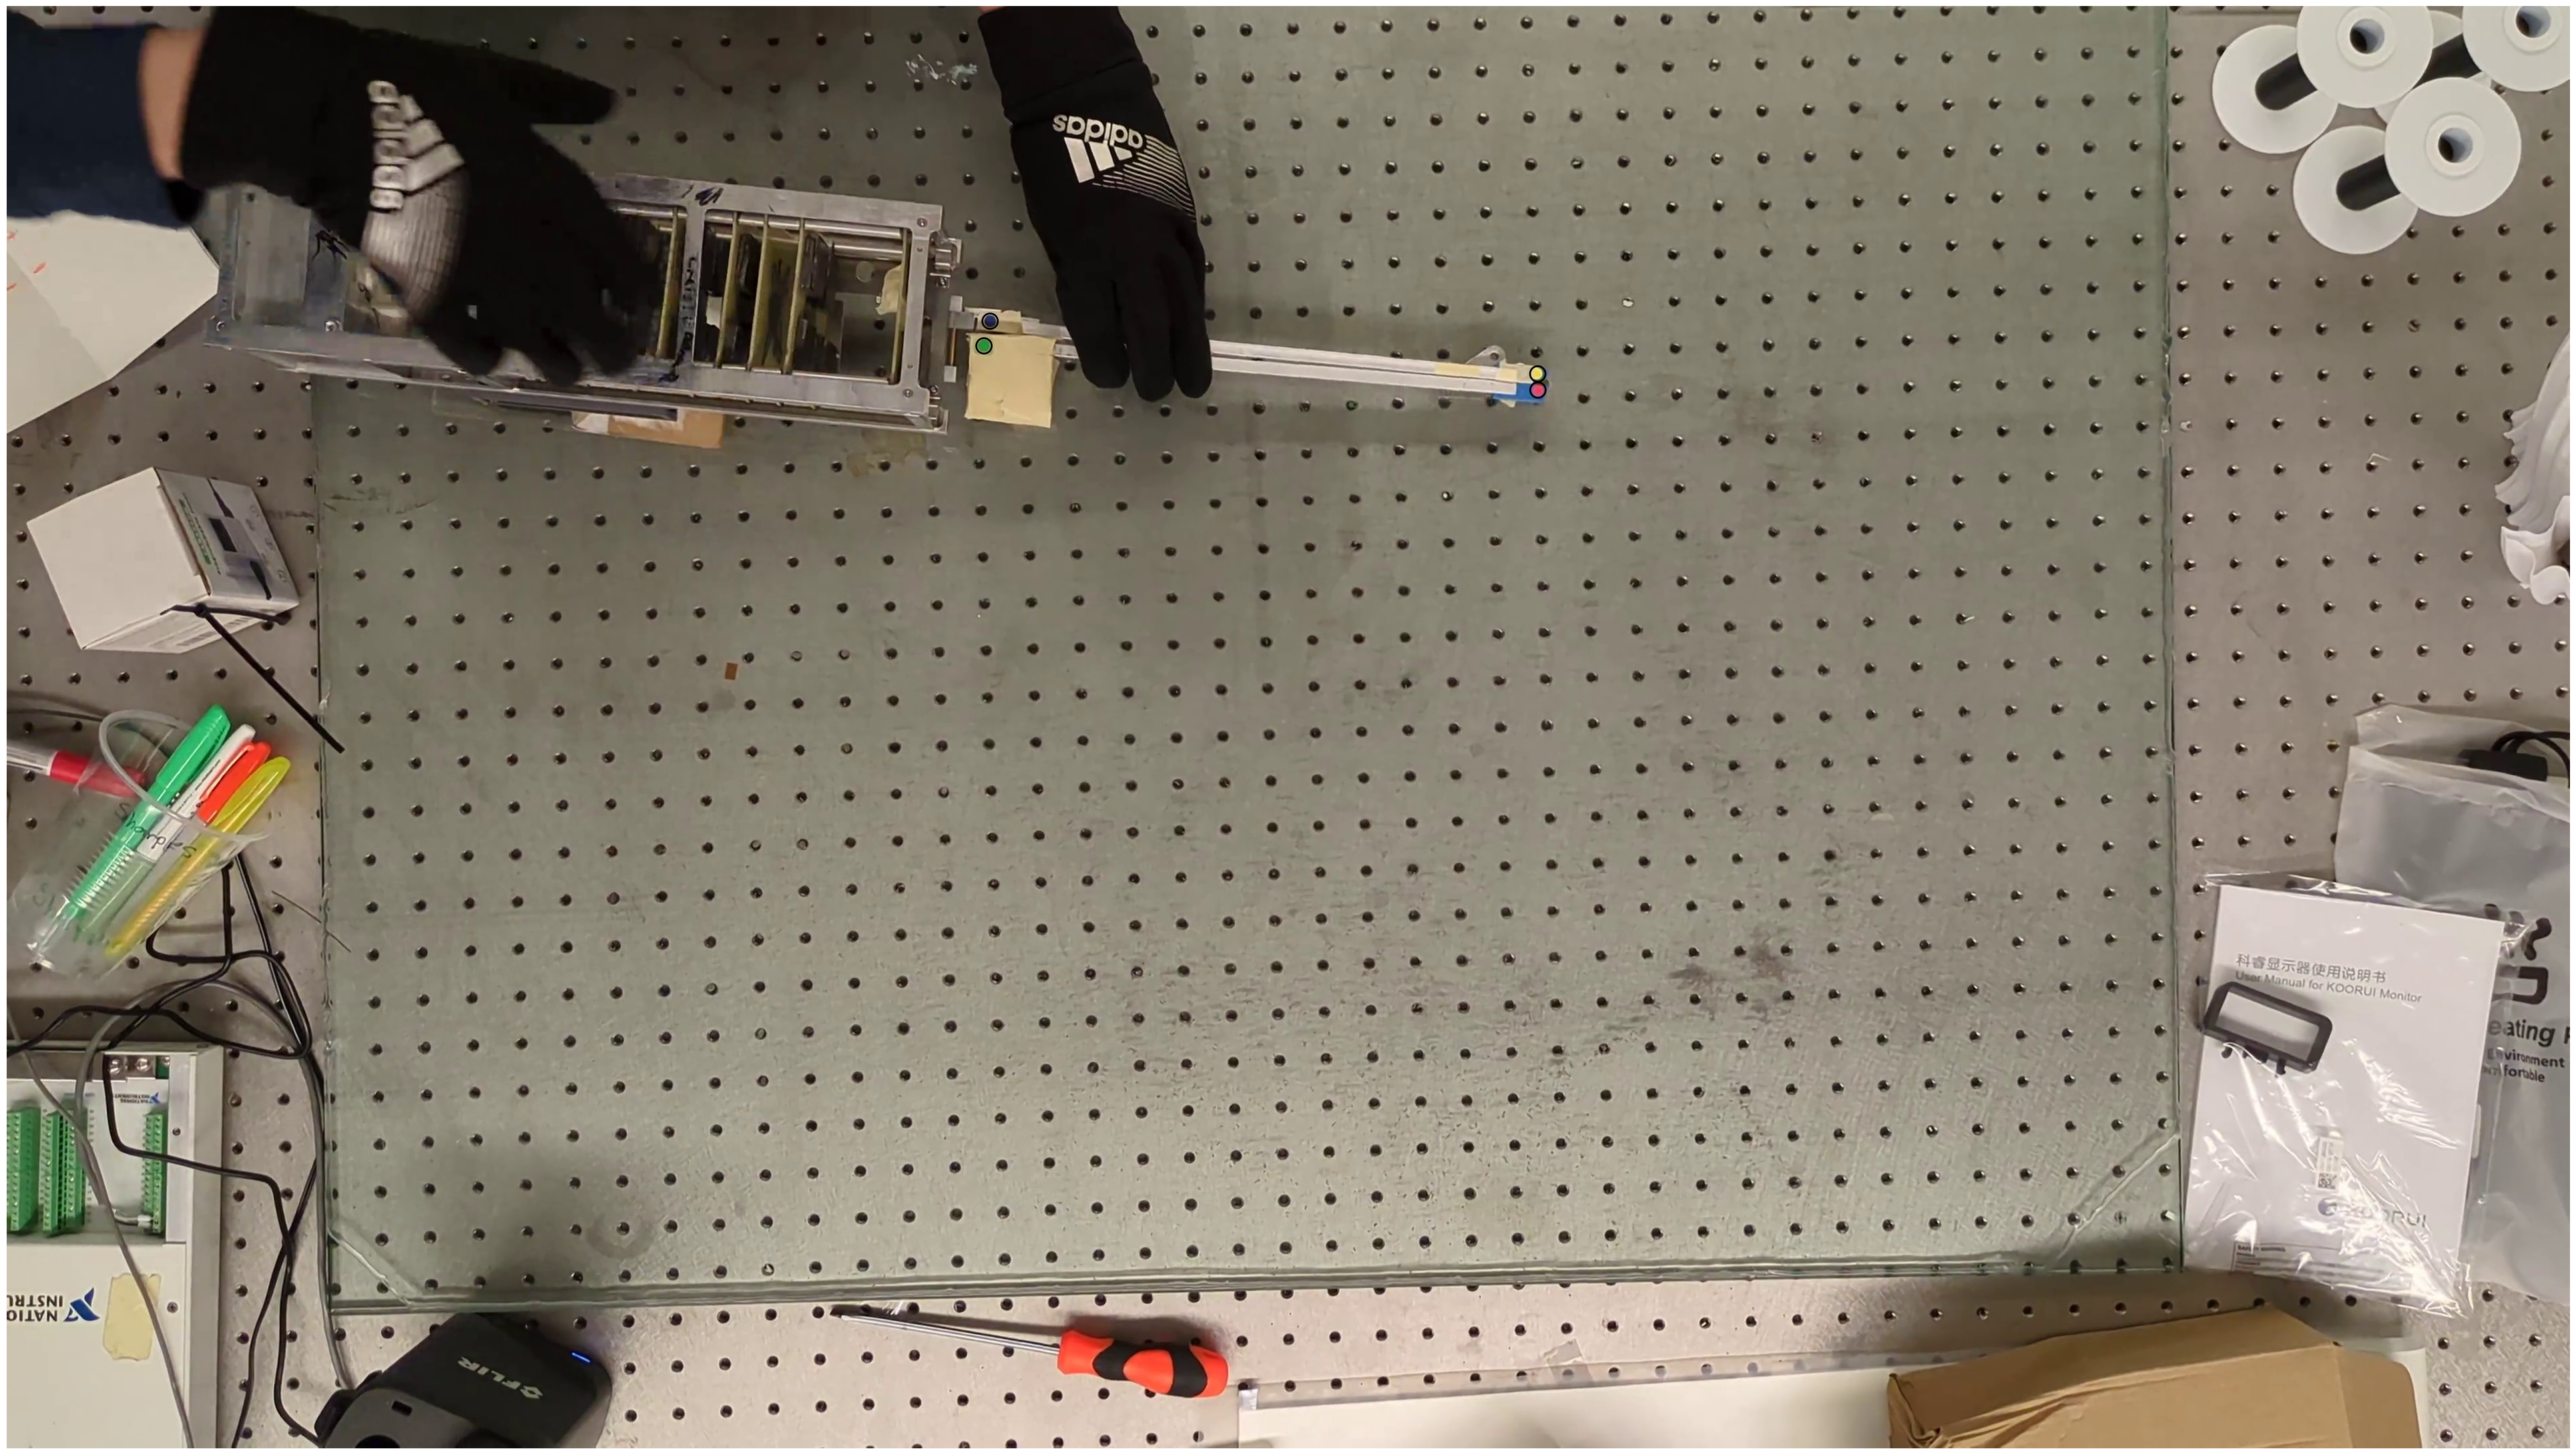

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import os
import numpy as np
import pandas as pd

# Load the points data from CSV
df = pd.read_csv(r'csvs\dataPixels.csv')

# Extract points as numpy arrays (no flipping)
point1 = df.iloc[:, 1:3].to_numpy(dtype=np.float64)  # Blue
point2 = df.iloc[:, 3:5].to_numpy(dtype=np.float64)  # Green
point3 = df.iloc[:, 5:7].to_numpy(dtype=np.float64)  # Red
point4 = df.iloc[:, 7:9].to_numpy(dtype=np.float64)  # Yellow

def openFiles():
    return sorted(glob(r'frames\*.png'))  # Ensure frames are in order

frame_files = openFiles()
output_dir = r'movie'
os.makedirs(output_dir, exist_ok=True)

for i, image_path in enumerate(frame_files[1:], start=1):  # Skip first frame if needed
    try:
        image = mpimg.imread(image_path)
        dpi = 96
        height, width = image.shape[:2]
        figsize = (width/dpi, height/dpi)
        
        fig = plt.figure(figsize=figsize, dpi=dpi)
        ax = fig.add_axes([0, 0, 1, 1])
        ax.imshow(image)
        
        # Plot all points for this frame using direct coordinates
        if i-1 < len(point1):
            # Blue point
            ax.scatter(point1[i-1, 0], point1[i-1, 1], 
                       edgecolors='black', facecolors='none', 
                       marker='o', s=100, linewidth=2)
            # Green point
            ax.scatter(point2[i-1, 0], point2[i-1, 1], 
                       edgecolors='black', facecolors='none', 
                       marker='o', s=100, linewidth=2)
            # Red point
            ax.scatter(point3[i-1, 0], point3[i-1, 1], 
                       edgecolors='black', facecolors='none', 
                       marker='o', s=100, linewidth=2)
            # Yellow point
            ax.scatter(point4[i-1, 0], point4[i-1, 1], 
                       edgecolors='black', facecolors='none', 
                       marker='o', s=100, linewidth=2)
        
        ax.set_axis_off()
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
        
        output_path = os.path.join(output_dir, f'frame{i}.png')
        fig.savefig(output_path, dpi=dpi, bbox_inches='tight', pad_inches=0)
        plt.close(fig)
        print(f'\rProcessed frame {i}/{len(frame_files)}', end='', flush=True)
        
    except Exception as e:
        print(f"\nError processing frame {i}: {str(e)}")

print("\nMovie frames generation complete!")

In [21]:
#merge Movie
import cv2
import os

def images_to_video(image_folder, output_video, fps=30):
    def getFrame(image):
        # frame1.png
        return int(image[len('frame'):].replace('.png',''))
    # print(os.listdir(image_folder))
    images = sorted(os.listdir(image_folder),key=getFrame)
    
    if not images:
        print("No PNG images found in the folder.")
        return
    
    first_image = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = first_image.shape
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(output_video, fourcc, fps, (width, height))
    
    for image in images:
        frame = cv2.imread(os.path.join(image_folder, image))
        video.write(frame)
    
    video.release()
    print(f"Video saved as {output_video}")

# Example usage
images_to_video(r'C:\Users\Abel\Desktop\DepolymentTracker\movie', "output.mp4", fps=60)


Video saved as output.mp4
